In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Exercise 04 : Histogram

In [3]:
con = sqlite3.connect('data/checking-logs.sqlite')

In [8]:
query ="""
SELECT timestamp AS commit_time
FROM checker
WHERE uid LIKE 'user_%'
"""

df = pd.read_sql(query, con)
df

,commit_time
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [9]:
df['commit_time'] =  pd.to_datetime(df['commit_time'])
df['day of week'] = df['commit_time'].dt.day_name()
df['hour'] = df['commit_time'].dt.hour
df.drop(columns=['commit_time'], inplace=True)

df

,day of week,hour
0,Friday,5
1,Friday,5
2,Friday,5
3,Friday,5
4,Friday,5
...,...,...
3202,Thursday,20
3203,Thursday,20
3204,Thursday,20
3205,Thursday,20


In [10]:
working_days = df[df['day of week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
working_counts = working_days.groupby(['hour']).size().reset_index(name='count')
working_counts

,hour,count
0,0,6
1,3,2
2,5,15
3,6,3
4,7,31
5,8,37
6,9,30
7,10,132
8,11,88
9,12,79


In [11]:
weekend_days = df[df['day of week'].isin(['Sunday', 'Saturday'])]
weekends_counts = weekend_days.groupby(['hour']).size().reset_index(name='count')
weekends_counts

,hour,count
0,0,6
1,1,6
2,3,1
3,5,2
4,7,16
5,8,28
6,9,22
7,10,28
8,11,118
9,12,57


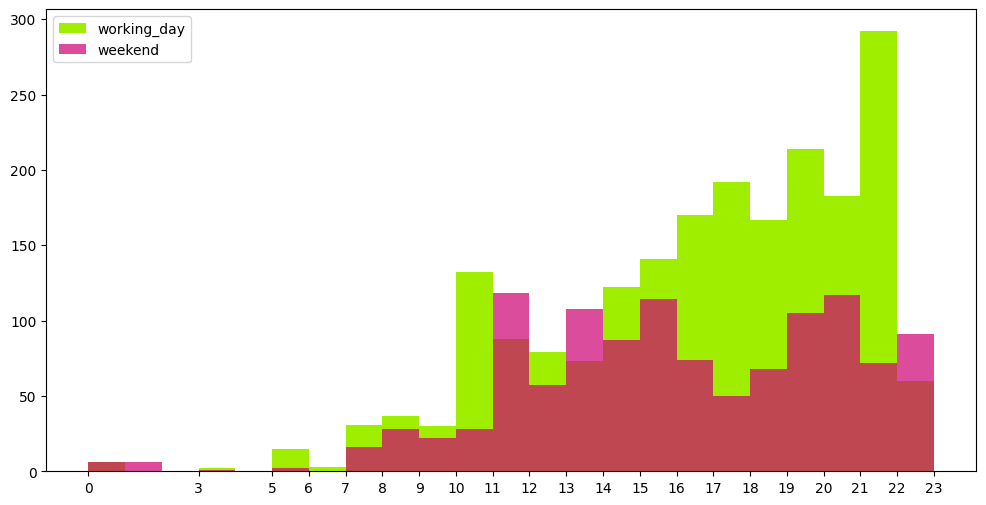

In [23]:
plt.figure(figsize=(12, 6))

plt.hist(working_counts['hour'], weights=working_counts['count'], 
         bins=range(24), color='#9FEE00', label='working_day'
        )

plt.hist(weekends_counts['hour'], weights=weekends_counts['count'], 
         bins=range(24), alpha=0.7, color='#CD0074', label='weekend'
        )

plt.xticks(working_counts['hour'])  
plt.legend()

plt.show()

## at the end of your Jupyter Notebook, create a markdown cell and insert the question: “Are there hours when the total number of commits was higher on weekends than on working days?” In your answer, put the top-4 examples.

Answer:
- 2
- 11
- 13
- 22

In [24]:
con.close()